In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_sty,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds
0,0:01:12,100,100000,0.050947,0.070677,0.015397,0.008502,0.067599,0.011160,0.286253,...,0.572720,0.698680,0.623936,59.976730,17.067492,0.359177,0.289655,1.618458,0.027983,0.0
1,0:01:49,200,100000,0.145800,0.006096,0.066599,0.019130,0.142771,0.030636,0.709457,...,0.541721,0.528454,0.460531,28.842003,2.531255,0.199881,0.164948,0.266526,0.021705,0.0
2,0:02:26,300,100000,0.086316,0.012134,0.043300,0.004880,0.104755,0.027740,0.209920,...,0.493366,0.539695,0.101969,22.160507,7.089580,0.150417,0.134933,0.441703,0.008402,0.0
3,0:03:02,400,100000,0.021205,0.029026,0.044668,0.002550,0.176374,0.030313,0.683562,...,0.529815,0.496171,0.410305,11.484230,3.252142,0.116006,0.098328,0.075144,0.017678,0.0
4,0:03:37,500,100000,0.074685,0.009095,0.025055,0.018962,0.124060,0.021875,0.562099,...,0.500151,0.457620,0.284191,14.563850,0.930902,0.087303,0.075158,0.226100,0.003283,0.0


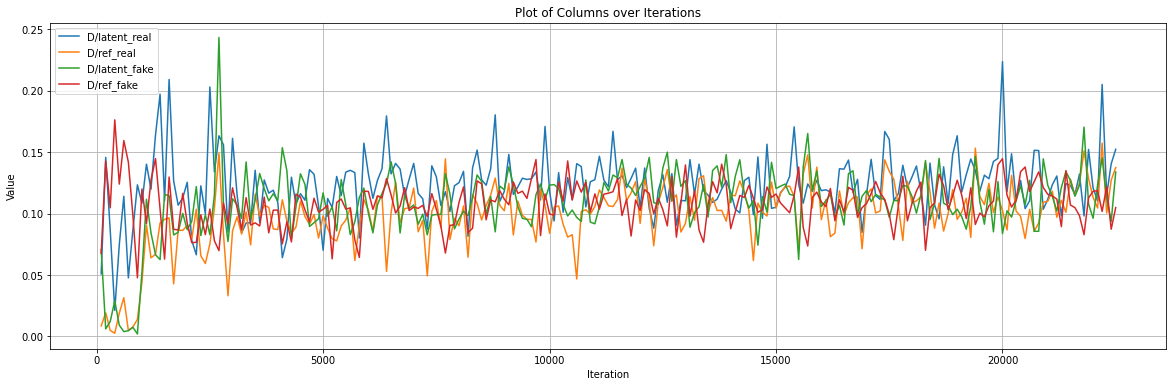

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

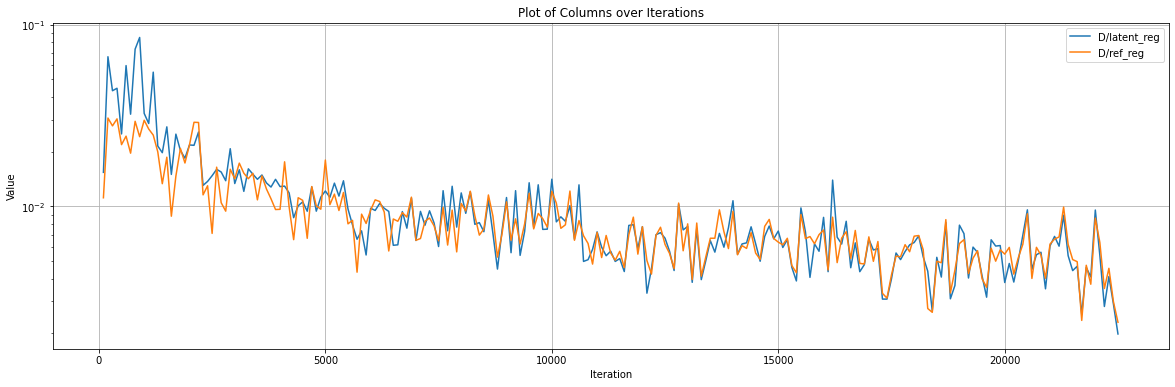

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

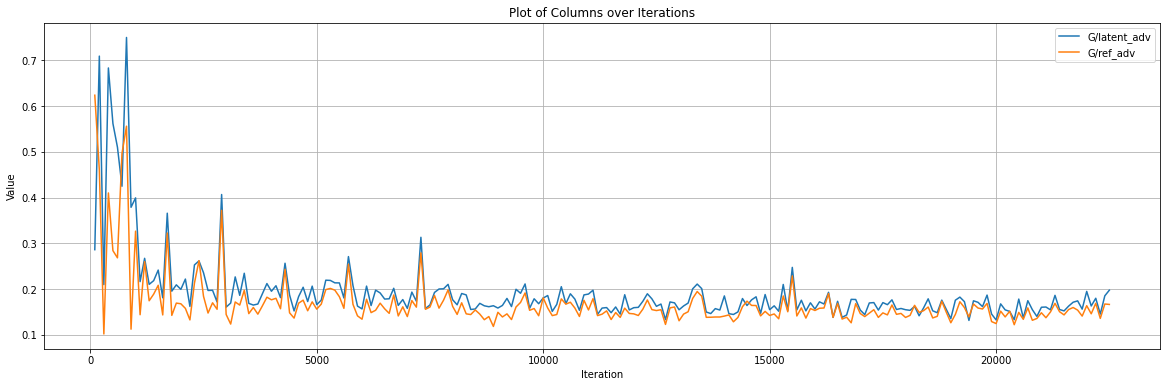

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

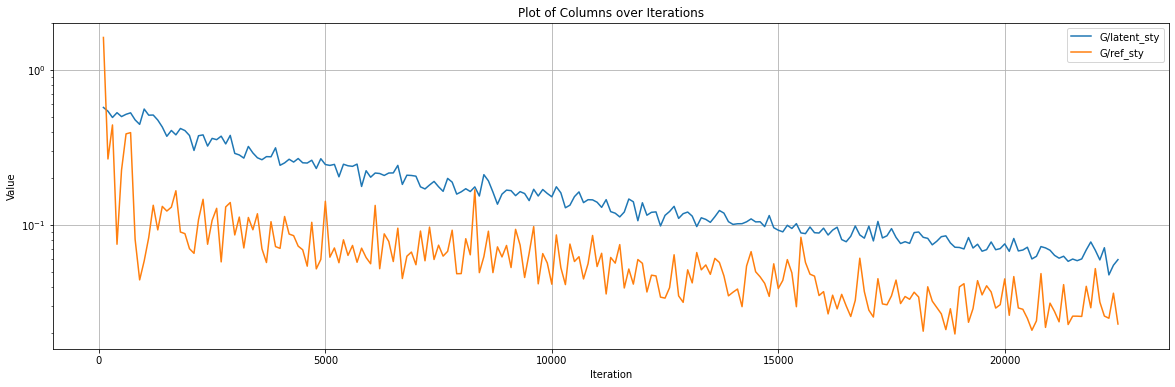

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

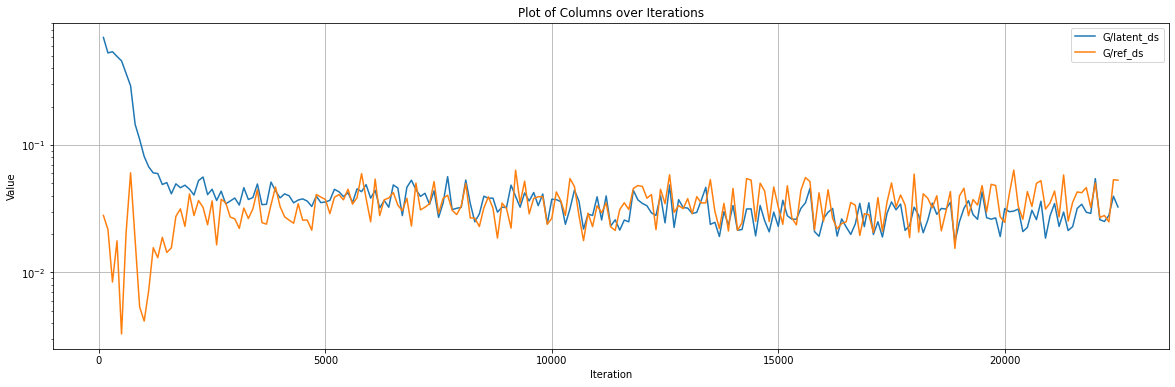

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

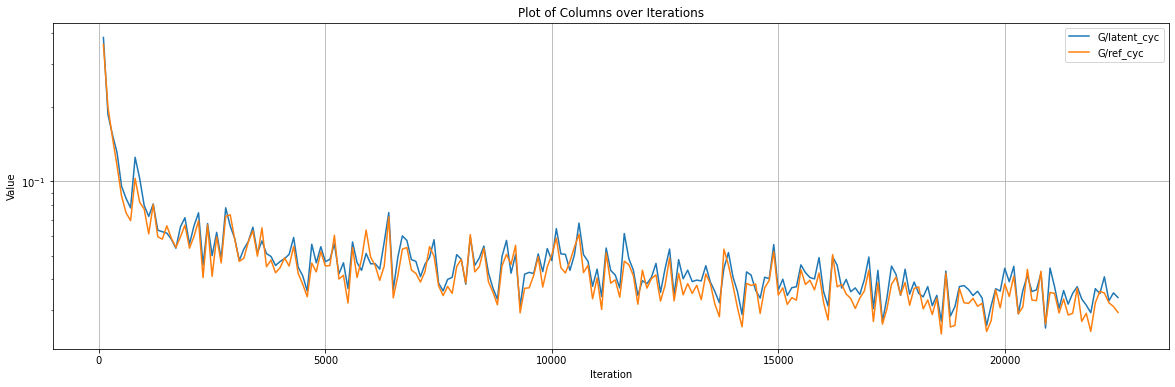

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

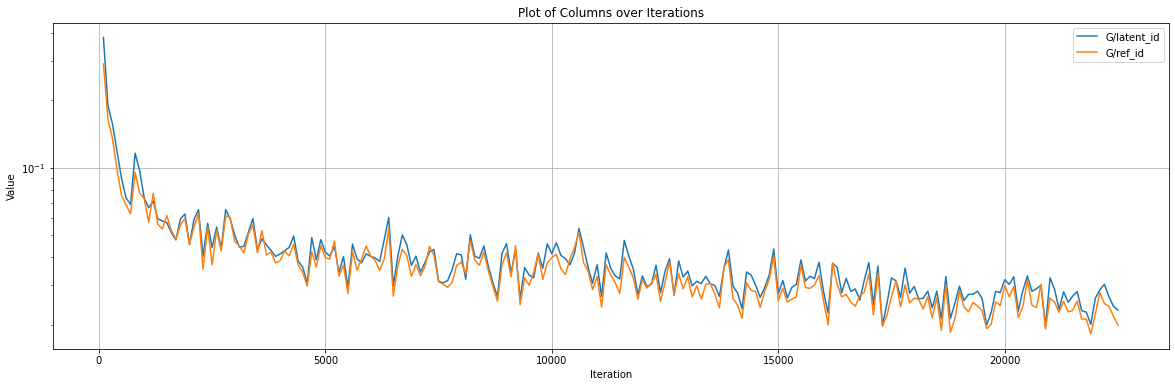

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

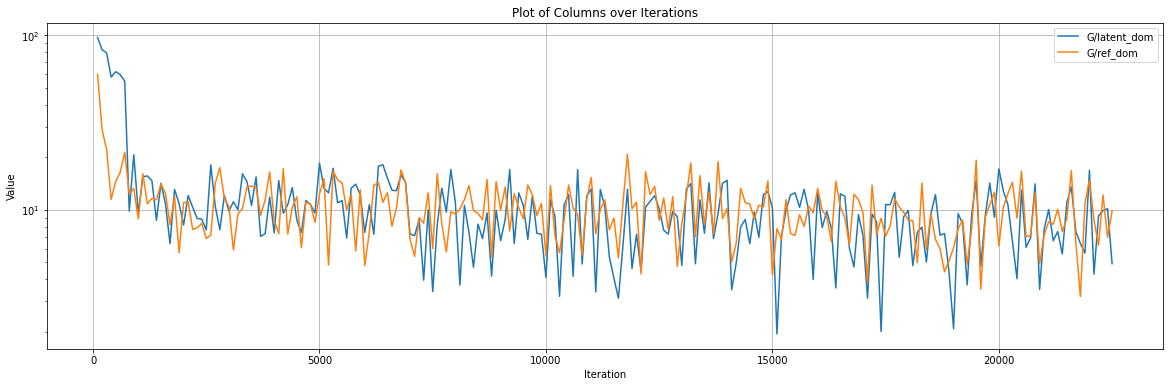

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

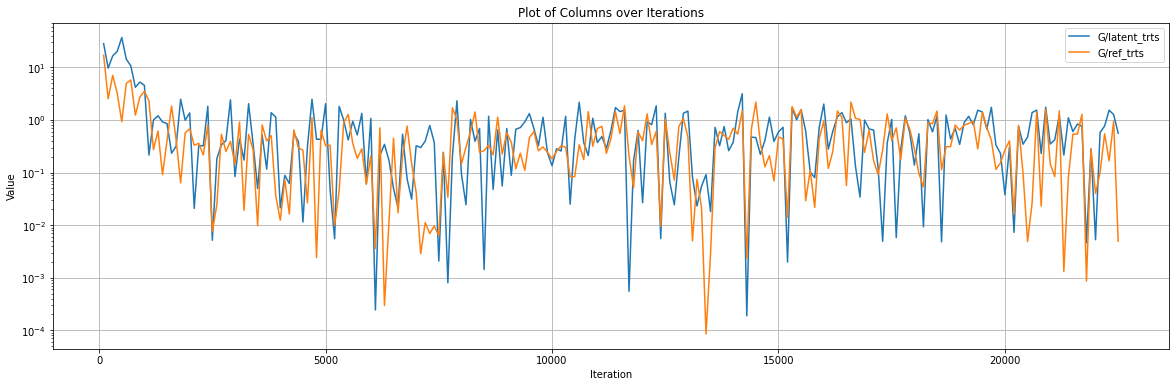

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

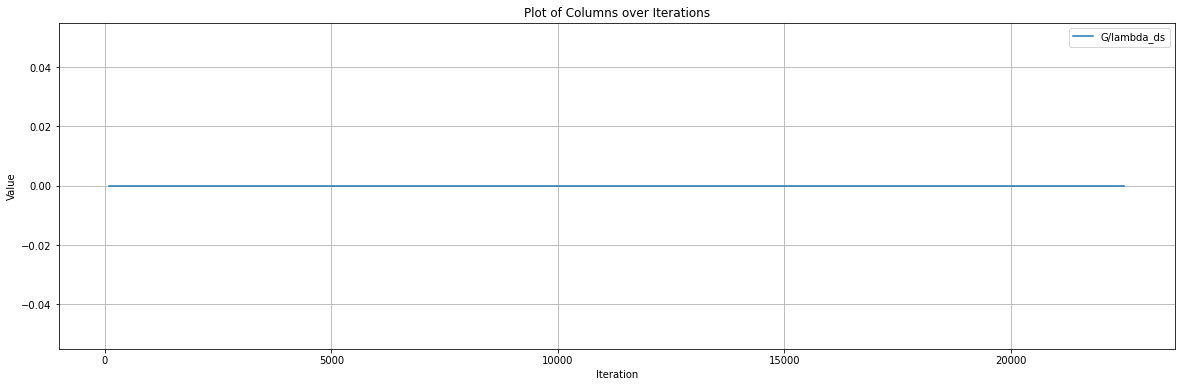

In [13]:
plot_columns(history, ['G/lambda_ds'])

# Metrics

In [14]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,WAL,CLU,10,0.355662,6.416299
1,2000,latent,WAL,CLU,11,0.335570,5.322033
2,2000,latent,WAL,CLU,12,0.371622,6.416563
3,2000,latent,WAL,CLU,13,0.263473,2.336285
4,2000,latent,WAL,CLU,14,0.369128,4.338695


Maximum accuracy for CLD in latent mode: 0.8558 at step 20000
Maximum accuracy for CLU in latent mode: 0.8994 at step 8000
Maximum accuracy for RUN in latent mode: 0.6706 at step 18000
Maximum accuracy for WAL in latent mode: 0.9094 at step 8000


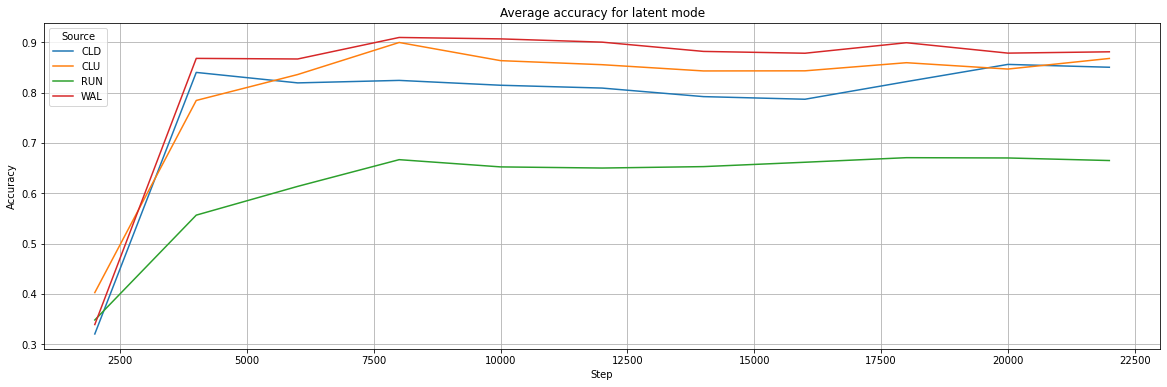

Maximum accuracy for CLD in reference mode: 0.9009 at step 22000
Maximum accuracy for CLU in reference mode: 0.8644 at step 18000
Maximum accuracy for RUN in reference mode: 0.7406 at step 10000
Maximum accuracy for WAL in reference mode: 0.9036 at step 10000


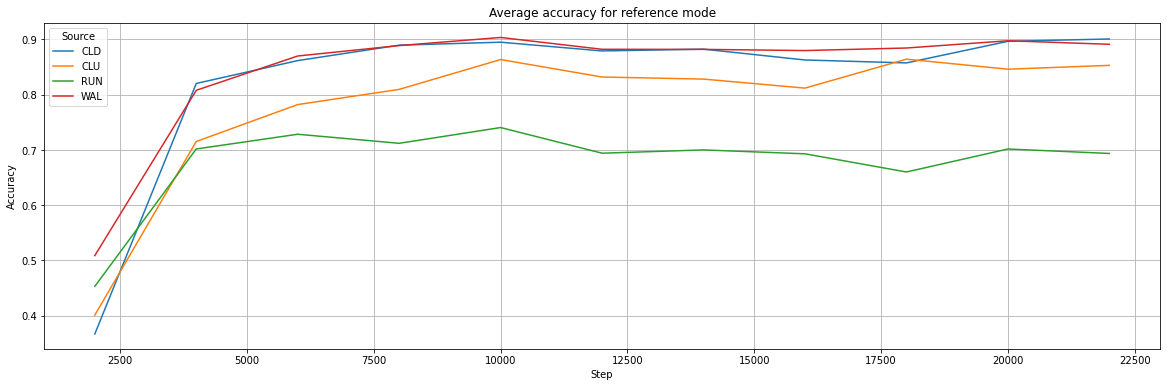

Minimum loss for CLD in latent mode: 0.7611 at step 20000
Minimum loss for CLU in latent mode: 0.5683 at step 8000
Minimum loss for RUN in latent mode: 1.7773 at step 8000
Minimum loss for WAL in latent mode: 0.6002 at step 18000


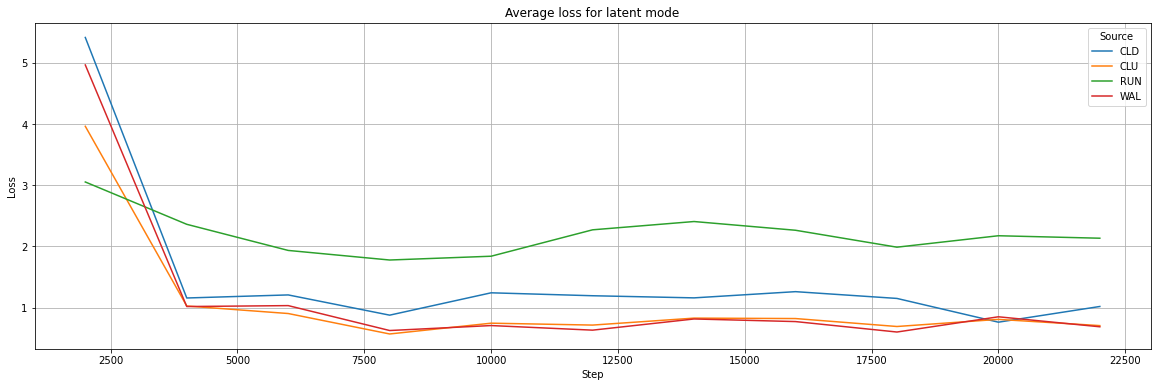

Minimum loss for CLD in reference mode: 0.4111 at step 10000
Minimum loss for CLU in reference mode: 0.6429 at step 18000
Minimum loss for RUN in reference mode: 1.3078 at step 10000
Minimum loss for WAL in reference mode: 0.5097 at step 10000


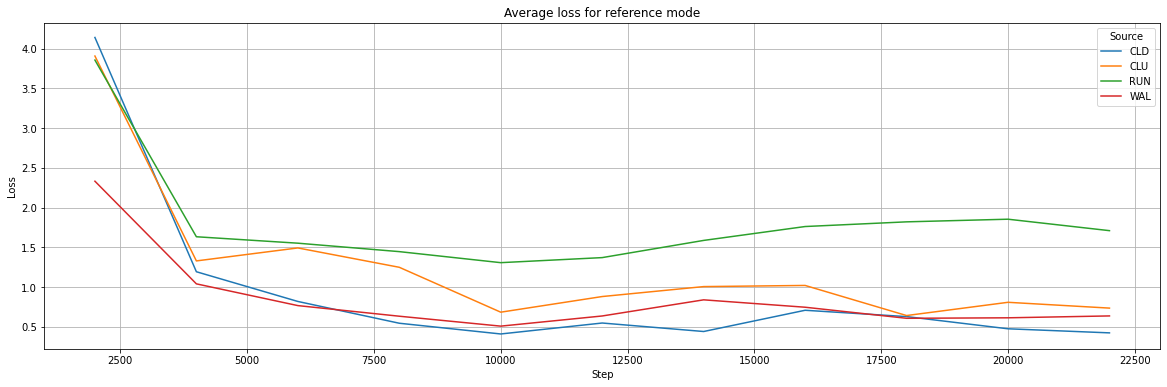

In [15]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8762 at step 20000
Maximum accuracy for CLU: 0.8635 at step 10000
Maximum accuracy for RUN: 0.6964 at step 10000
Maximum accuracy for WAL: 0.9051 at step 10000


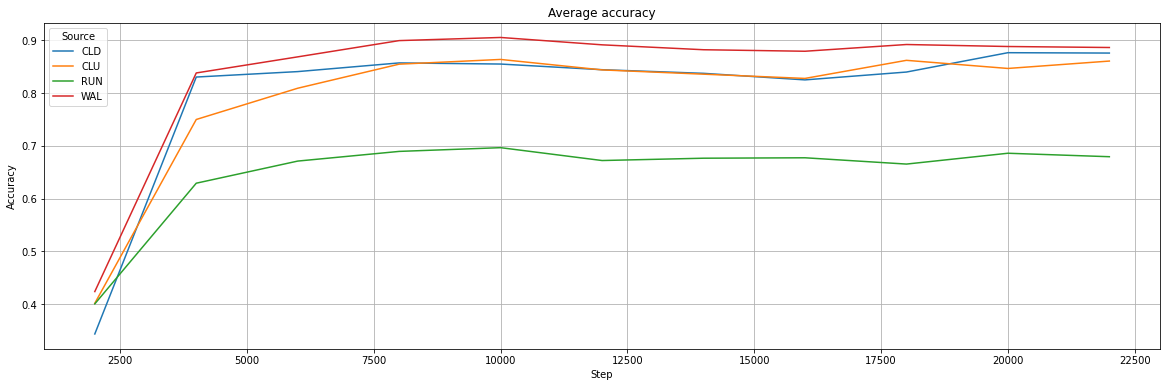

Minimum loss for CLD: 0.6187 at step 20000
Minimum loss for CLU: 0.6667 at step 18000
Minimum loss for RUN: 1.5736 at step 10000
Minimum loss for WAL: 0.6042 at step 18000


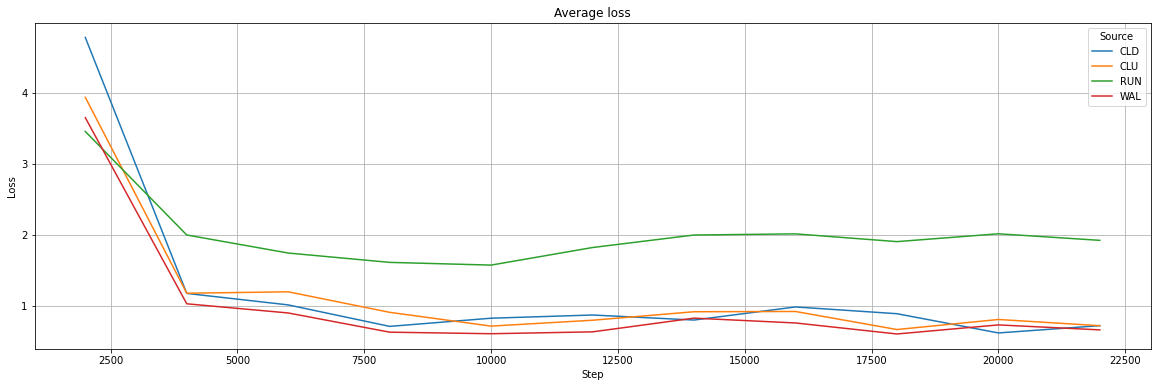

In [16]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8249 at step 8000
Max in reference mode: 0.8507 at step 10000


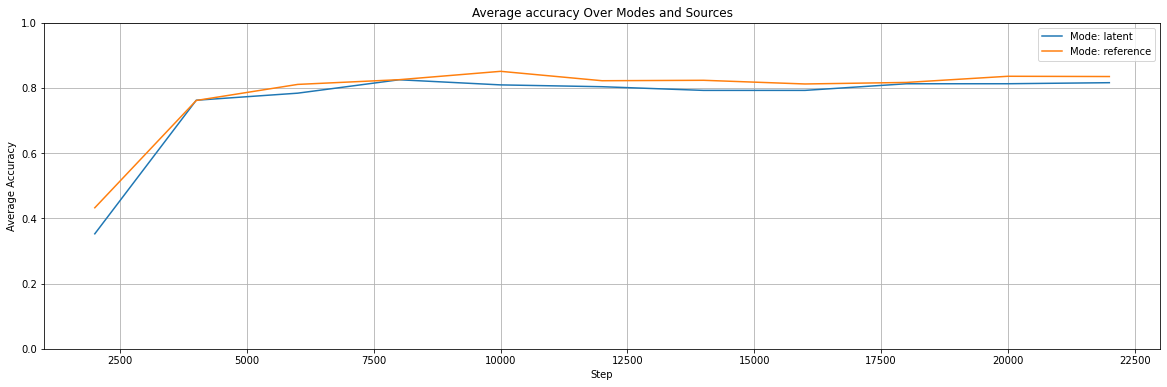

Min in latent mode: 0.9615 at step 8000
Min in reference mode: 0.7285 at step 10000


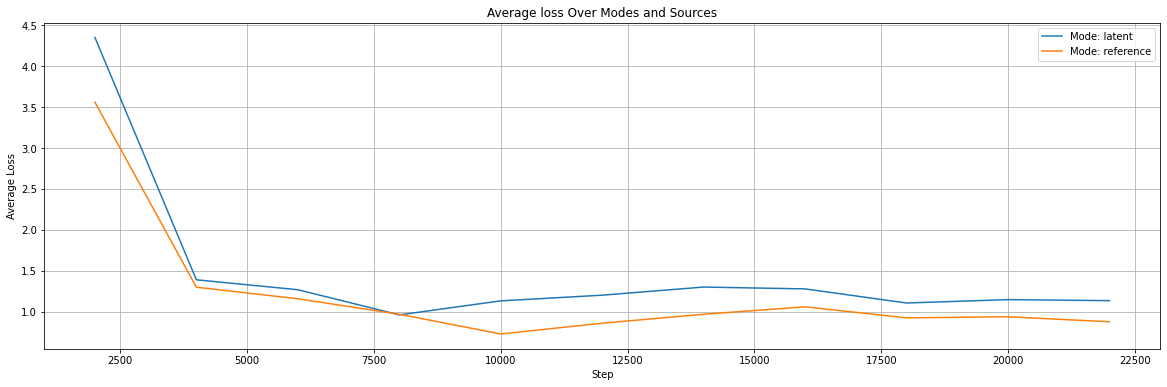

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [18]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,WAL,RUN,0.206388,5.011610
1,2000,latent,WAL,CLD,0.173628,4.824330
2,2000,latent,WAL,CLU,0.174447,6.159119
3,2000,latent,RUN,WAL,0.206709,4.954348
4,2000,latent,RUN,CLD,0.236627,4.645393


Maximum accuracy in latent mode: 0.3824 at step 20000


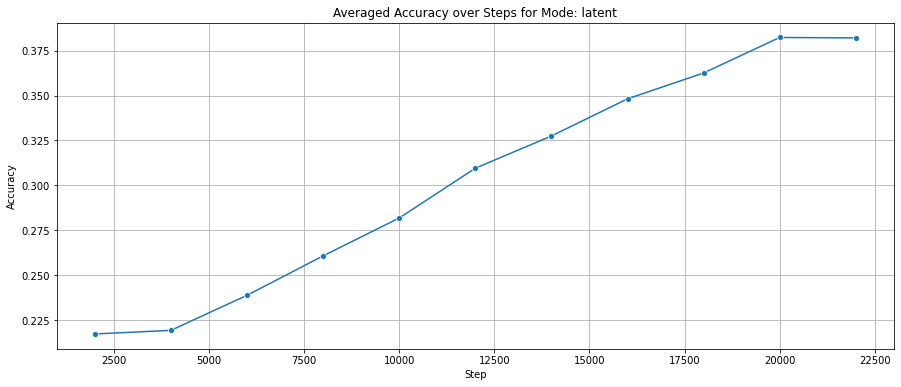

Maximum accuracy in reference mode: 0.3764 at step 20000


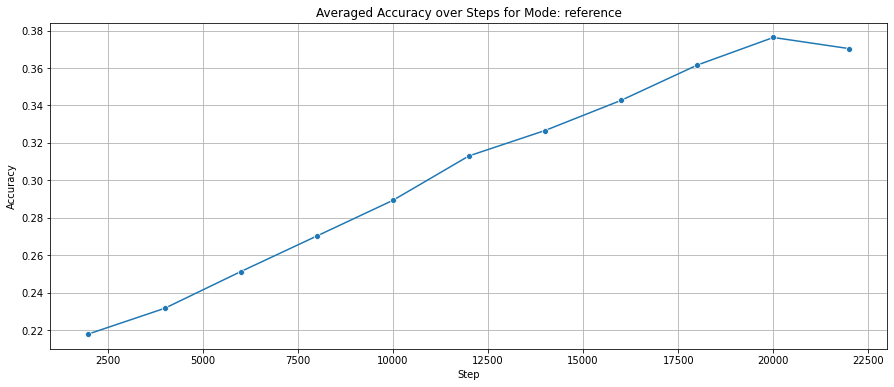

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')